SMC8 - Test Resuts

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import csv
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload files
csv_file_path = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Aftertest _Questionnaire.csv"
data_afterquestionnaire = pd.read_csv(csv_file_path, usecols=[i for i in range(1,24)], header = 0, names = ['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','GQ1', 'GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7', 'FQ1', 'FQ2', 'FQ3', 'Comments'])
data_afterquestionnaire.rename(columns={"Subject Id\n":"Subject Id"}, inplace=True)

data_afterquestionnaire.head()
csv_file_path1 = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Beforetest_Questionnaire.csv"
data_beforequestionnaire = pd.read_csv(csv_file_path1,usecols=[i for i in range(2,15)],header = 0, names=['Subject Id', 'Group Id', 'Age', 'Gender', 'Nationality', 'OMSI', 'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7'])
data_beforequestionnaire.loc[data_beforequestionnaire['Task5'] == 0, 'Task5'] = 6


csv_file_path2 = "/home/ibroto/Documents/SMC/proj_SoundField/testData/AlternativeTestQuestionnaire.csv"
data_alternativequestionnaire = pd.read_csv(csv_file_path2,usecols=[i for i in range(1,17)],header = 0, names=['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'FQ1', 'FQ2', 'FQ3', 'Comments'])
data_alternativequestionnaire.head()

merged = data_beforequestionnaire.merge(data_afterquestionnaire, on=['Subject Id', 'Group Id'])

## Learning assesment questionaire data

In [3]:
questions = ['Subject Id', 'Group Id', 'FQ1', 'FQ2', 'FQ3']

learn_ass = data_alternativequestionnaire[questions].merge(data_afterquestionnaire[questions], on = ['Subject Id', 'Group Id'], suffixes=['_indiv', '_interact'])


for i in range(1,4):
    learn_ass[f'diff_FQ{i}'] = learn_ass[f'FQ{i}_interact'] - learn_ass[f'FQ{i}_indiv']
    
learn_ass.head()

,Subject Id,Group Id,FQ1_indiv,FQ2_indiv,FQ3_indiv,FQ1_interact,FQ2_interact,FQ3_interact,diff_FQ1,diff_FQ2,diff_FQ3
0,12,4,3,3,5,3,2,3,0,-1,-2
1,5,2,4,3,5,2,4,5,-2,1,0
2,2,1,2,3,5,4,4,5,2,1,0
3,4,2,1,3,4,1,3,5,0,0,1
4,11,4,1,4,4,1,4,2,0,0,-2


## SUS Score computation

In [4]:
odd_questions = ['Q1', 'Q3', 'Q5', 'Q7', 'Q9']
even_questions = ['Q2', 'Q4', 'Q6', 'Q8', 'Q10']

SUS_data_alt = data_alternativequestionnaire[['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].copy()

for i in odd_questions:
    SUS_data_alt[i] = SUS_data_alt[i]-1


for i in even_questions:
    SUS_data_alt[i] = 5 - SUS_data_alt[i]

SUS_data_alt['SUS'] = SUS_data_alt[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)*2.5



SUS_data = data_afterquestionnaire[['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].copy()
for i in odd_questions:
    SUS_data[i] = SUS_data[i]-1


for i in even_questions:
    SUS_data[i] = 5 - SUS_data[i]

SUS_data['SUS'] = SUS_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)*2.5


print(f"avg SUS: {SUS_data_alt['SUS'].mean()}    std dev SUS: {SUS_data_alt['SUS'].std()}")
print(f"avg SUS: {SUS_data['SUS'].mean()}    std dev SUS: {SUS_data['SUS'].std()}")


SUS_omsi = SUS_data.merge(SUS_data_alt, on=['Subject Id', 'Group Id'], suffixes=['_interact','_indiv'])


for i in range(1,11):
    SUS_omsi[f'diff_Q{i}'] = SUS_omsi[f'Q{i}_interact'] - SUS_omsi[f'Q{i}_indiv']
    
SUS_omsi['SUS_diff'] = SUS_omsi['SUS_interact'] - SUS_omsi['SUS_indiv']


SUS_omsi = data_beforequestionnaire[['Subject Id', 'Group Id', 'OMSI']].merge(SUS_omsi, on=['Subject Id', 'Group Id'])
SUS_omsi['MusicExpert'] = SUS_omsi['OMSI']>500
SUS_omsi.head()

avg SUS: 77.08333333333333    std dev SUS: 19.418633662885075
avg SUS: 65.41666666666667    std dev SUS: 19.212724634439226


,Subject Id,Group Id,OMSI,Q1_interact,Q2_interact,Q3_interact,Q4_interact,Q5_interact,Q6_interact,Q7_interact,...,diff_Q3,diff_Q4,diff_Q5,diff_Q6,diff_Q7,diff_Q8,diff_Q9,diff_Q10,SUS_diff,MusicExpert
0,1,1,157,2,1,2,1,2,2,3,...,-2,-2,-1,0,-1,-1,-1,0,-27.5,False
1,2,1,893,2,3,1,2,2,2,3,...,-3,-2,-2,0,-1,-1,-1,0,-22.5,True
2,3,1,171,2,3,3,3,3,2,4,...,0,0,0,-2,0,-1,0,-1,-12.5,False
3,4,2,816,2,4,4,4,4,4,3,...,0,0,0,1,0,0,0,0,2.5,True
4,5,2,132,2,4,3,3,3,3,2,...,-1,-1,-1,-1,-2,0,0,0,-15.0,False


## Team environment computation

In [5]:
GEQ_data = data_afterquestionnaire[['Subject Id', 'Group Id', 'GQ1', 'GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7']].copy()
normal_score = ["GQ5", "GQ6", "GQ7"]
reverse_score = ['GQ1', "GQ2", "GQ3", "GQ4"]

for i in normal_score:
    GEQ_data[i] = GEQ_data[i]


for i in reverse_score:
    GEQ_data[i] = 6 - GEQ_data[i]

GEQ_data['GEQ_avg'] = GEQ_data[normal_score+reverse_score].mean(axis=1)
GEQ_data['GEQ_sum'] = GEQ_data[normal_score+reverse_score].sum(axis=1)
GEQ_data['GEQ_std'] = GEQ_data[normal_score+reverse_score].std(axis=1)
GEQ_data.head()

,Subject Id,Group Id,GQ1,GQ2,GQ3,GQ4,GQ5,GQ6,GQ7,GEQ_avg,GEQ_sum,GEQ_std
0,3,1,5,4,5,2,5,3,3,3.857143,27,1.214986
1,1,1,3,2,3,3,4,1,4,2.857143,20,1.069045
2,2,1,5,5,5,5,5,3,5,4.714286,33,0.755929
3,5,2,5,4,5,5,5,4,5,4.714286,33,0.487950
4,6,2,5,1,5,5,5,4,5,4.285714,30,1.496026


## Statistical tests

In [6]:
df = GEQ_data.merge(learn_ass,on=['Subject Id', 'Group Id'])
df = SUS_omsi.merge(df, on=['Subject Id', 'Group Id'])
categorical_cols = ['MusicExpert']  # replace with your actual column names
continuous_cols = ['SUS_interact', 'SUS_indiv','SUS_diff', 'OMSI', 'GEQ_avg', 'GEQ_sum','FQ1_indiv', 'FQ2_indiv', 'FQ3_indiv',
       'FQ1_interact', 'FQ2_interact', 'FQ3_interact', 'diff_FQ1', 'diff_FQ2',
       'diff_FQ3']
#df.columns




In [7]:
import pandas as pd
import scipy.stats as stats
import itertools

def analyze_relationships(df, categorical_cols, continuous_cols):
    results = []

    # 1. Categorical vs Categorical: Chi-square test
    for col1, col2 in itertools.combinations(categorical_cols, 2):
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, _, _ = stats.chi2_contingency(contingency)
        results.append({
            'var1': col1, 'var2': col2,
            'type': 'chi2', 'stat': chi2, 'p-value': p
        })

    # 2. Continuous vs Continuous: Pearson correlation
    for col1, col2 in itertools.combinations(continuous_cols, 2):
        corr, p = stats.pearsonr(df[col1], df[col2])
        results.append({
            'var1': col1, 'var2': col2,
            'type': 'pearson', 'stat': corr, 'p-value': p
        })

    # 3. Categorical vs Continuous: ANOVA
    for cat in categorical_cols:
        for cont in continuous_cols:
            groups = [df[cont][df[cat] == level] for level in df[cat].dropna().unique()]
            f_stat, p = stats.f_oneway(*groups)
            results.append({
                'var1': cat, 'var2': cont,
                'type': 'anova', 'stat': f_stat, 'p-value': p
            })

    return pd.DataFrame(results)


In [8]:
results_df = analyze_relationships(df, categorical_cols, continuous_cols)
print(results_df.sort_values('p-value'))
results_df.sort_values('p-value').to_csv('./GlobalStats.csv')




             var1          var2     type          stat   p-value
50        GEQ_avg       GEQ_sum  pearson  1.000000e+00  0.000000
108   MusicExpert          OMSI    anova  3.962337e+01  0.000090
111   MusicExpert     FQ1_indiv    anova  1.846154e+01  0.001570
101  FQ3_interact      diff_FQ3  pearson  7.873360e-01  0.002367
97   FQ2_interact      diff_FQ2  pearson  7.080283e-01  0.009979
..            ...           ...      ...           ...       ...
67        GEQ_sum      diff_FQ2  pearson  1.425768e-02  0.964922
22      SUS_indiv  FQ2_interact  pearson  1.293909e-02  0.968165
2    SUS_interact          OMSI  pearson -1.543952e-03  0.996200
94   FQ1_interact      diff_FQ3  pearson  5.551115e-17  1.000000
119   MusicExpert      diff_FQ3    anova  1.283953e-33  1.000000

[120 rows x 5 columns]


In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

def check_manual_categorization(var_name):
    return var_name in ['MusicExpert'] #add more if want tot try as categorical

def is_categorical(series, threshold=10):
    """Heuristic: treat as categorical if dtype is object/category or few unique values."""
    return pd.api.types.is_categorical_dtype(series) or \
           pd.api.types.is_object_dtype(series) or \
           series.nunique() <= threshold

def auto_plot_relationship(df, var1, var2):
    x = df[var1]
    y = df[var2]

    # Detect variable types
    var1_cat = is_categorical(x)
    var2_cat = is_categorical(y)

    manual_var1_cat = check_manual_categorization(var1)
    manual_var2_cat = check_manual_categorization(var2)

    # Plot
    plt.figure(figsize=(8, 6))

    if (not var1_cat and not var2_cat) or (not manual_var1_cat and not manual_var2_cat):
        # Continuous vs Continuous
        sns.lmplot(data=df, x=var1, y=var2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        plt.title(f'Scatter plot with regression: {var1} vs {var2}')
        plt.tight_layout()
        plt.show()

    if var1_cat and not var2_cat:
        # Categorical vs Continuous
        sns.boxplot(data=df, x=var1, y=var2)
        plt.title(f'Boxplot: {var2} by {var1}')
        plt.tight_layout()
        plt.show()

    elif not var1_cat and var2_cat:
        # Continuous vs Categorical (swap for boxplot)
        sns.boxplot(data=df, x=var2, y=var1)
        plt.title(f'Boxplot: {var1} by {var2}')
        plt.tight_layout()
        plt.show()

    else:
        # Categorical vs Categorical
        ct = pd.crosstab(df[var1], df[var2], normalize='index')
        sns.heatmap(ct, annot=True, cmap='Blues')
        plt.title(f'Heatmap: {var1} vs {var2}')
        plt.tight_layout()
        plt.show()

        # Optional: mosaic plot
        if manual_var1_cat or manual_var2_cat:
            print("Showing mosaic plot as well...")
            mosaic(df, [var1, var2])
            plt.title(f'Mosaic: {var1} vs {var2}')
            plt.show()


             var1          var2     type   p-value
0    SUS_interact     SUS_indiv  pearson  0.039569
10   SUS_interact  FQ3_interact  pearson  0.015348
13   SUS_interact      diff_FQ3  pearson  0.017427
16      SUS_indiv       GEQ_avg  pearson  0.010203
17      SUS_indiv       GEQ_sum  pearson  0.010203
41           OMSI     FQ1_indiv  pearson  0.016511
47           OMSI      diff_FQ1  pearson  0.041153
50        GEQ_avg       GEQ_sum  pearson  0.000000
74      FQ1_indiv      diff_FQ1  pearson  0.013052
97   FQ2_interact      diff_FQ2  pearson  0.009979
101  FQ3_interact      diff_FQ3  pearson  0.002367
108   MusicExpert          OMSI    anova  0.000090
109   MusicExpert       GEQ_avg    anova  0.030031
110   MusicExpert       GEQ_sum    anova  0.030031
111   MusicExpert     FQ1_indiv    anova  0.001570
117   MusicExpert      diff_FQ1    anova  0.032701


/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

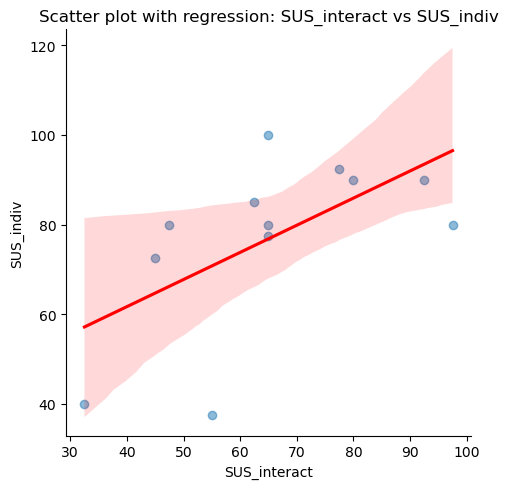

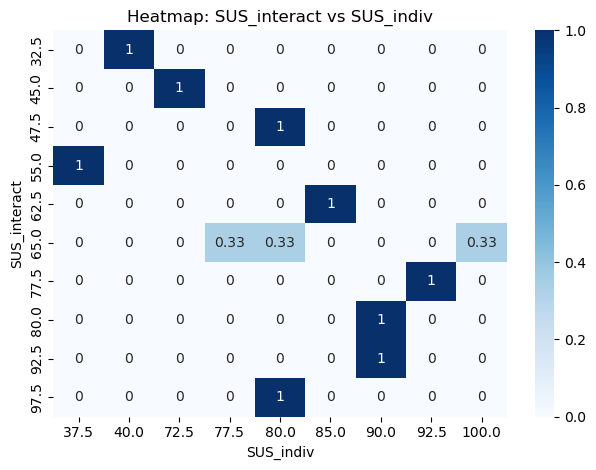

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

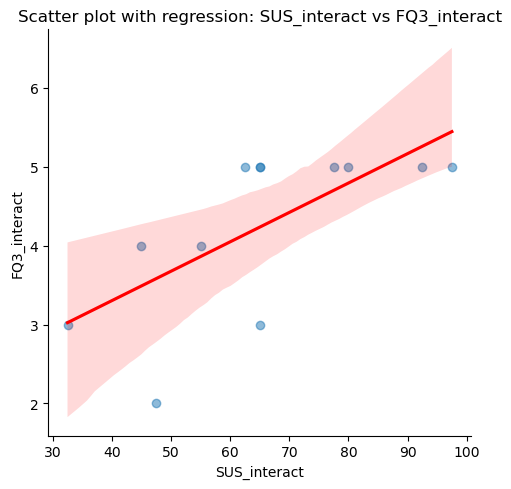

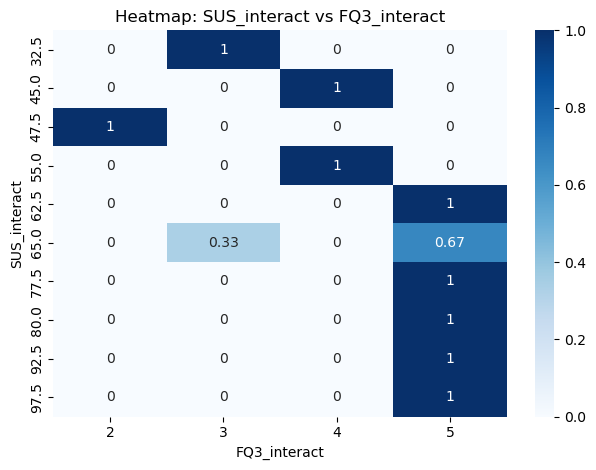

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

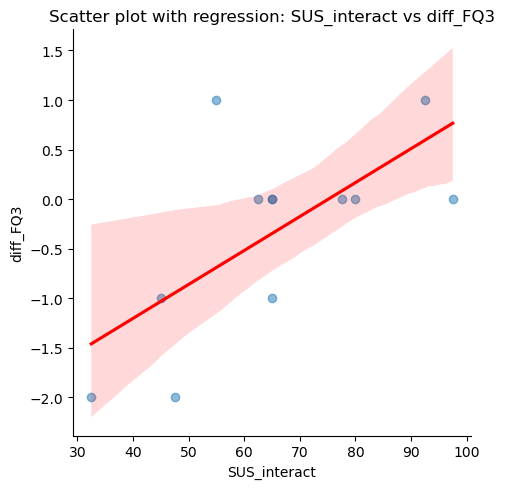

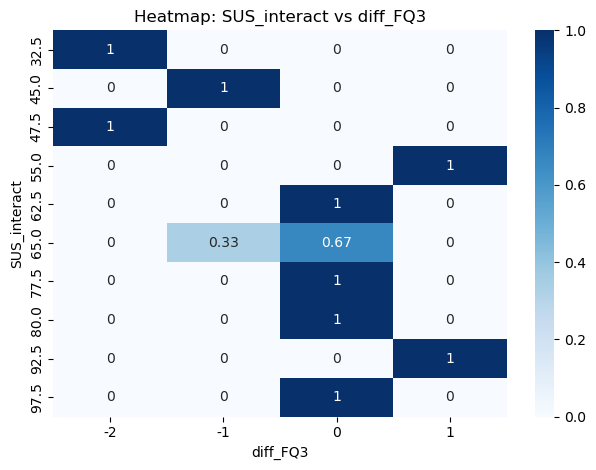

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

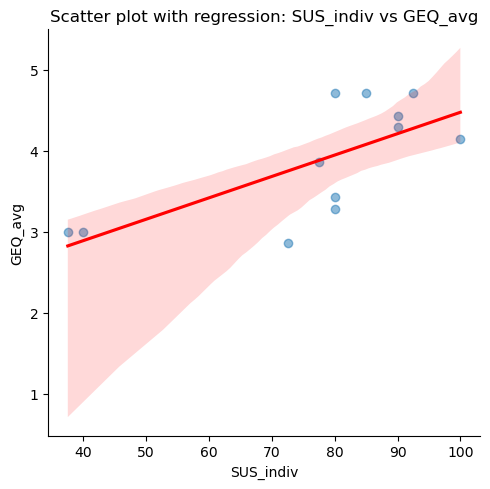

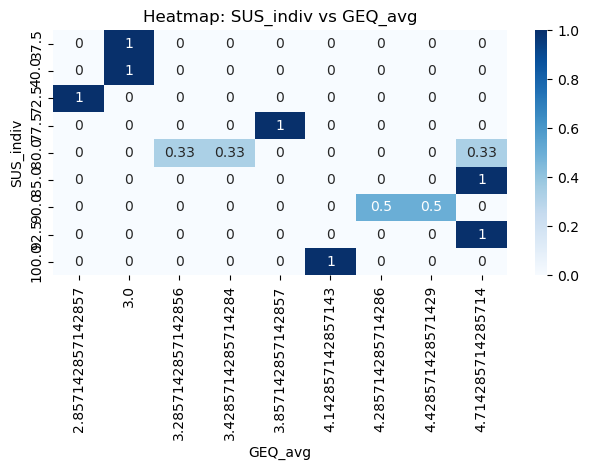

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

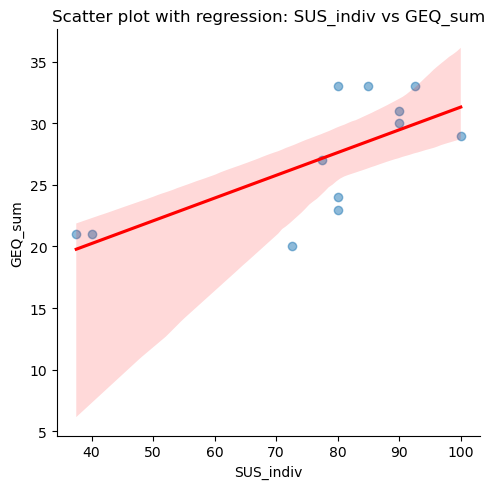

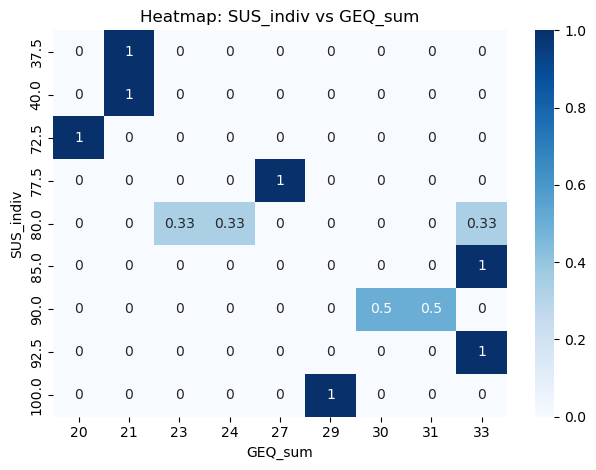

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

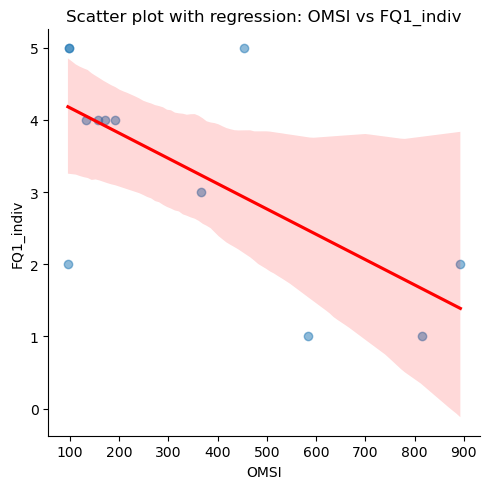

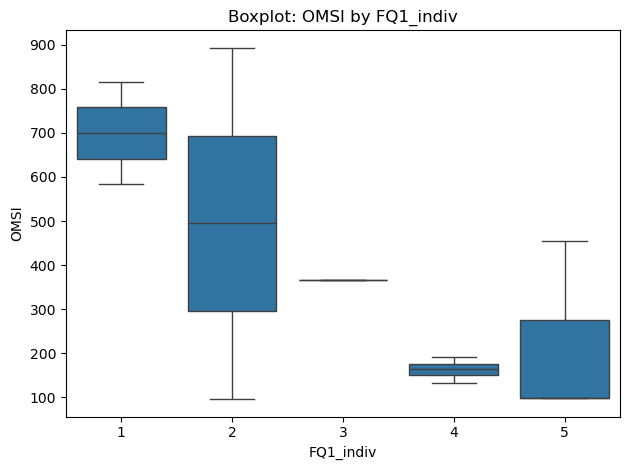

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

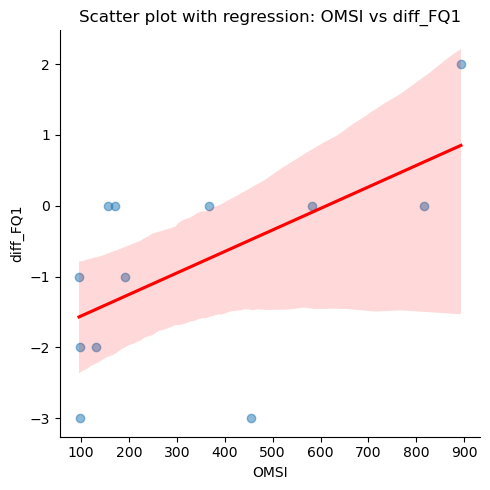

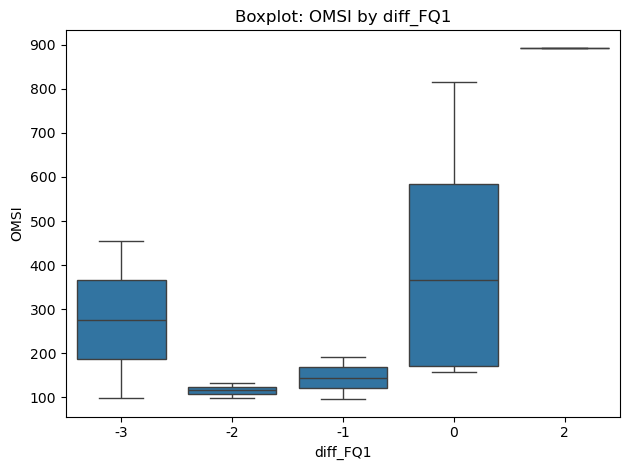

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

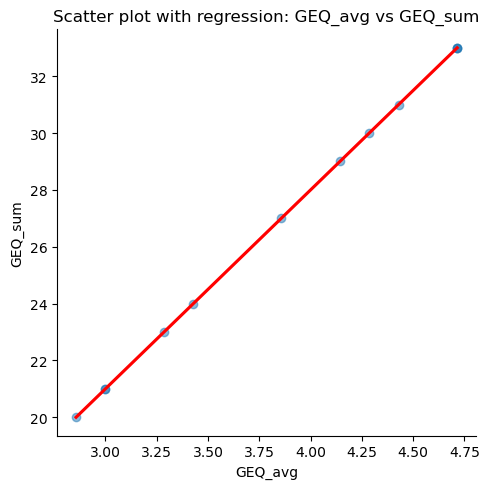

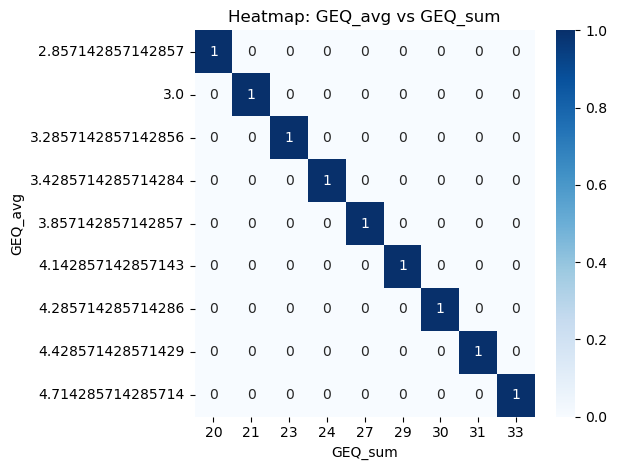

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

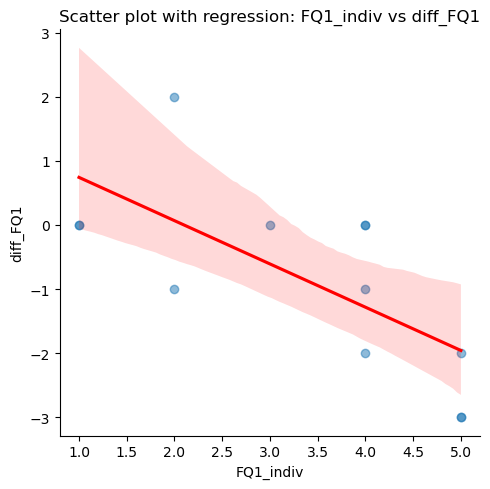

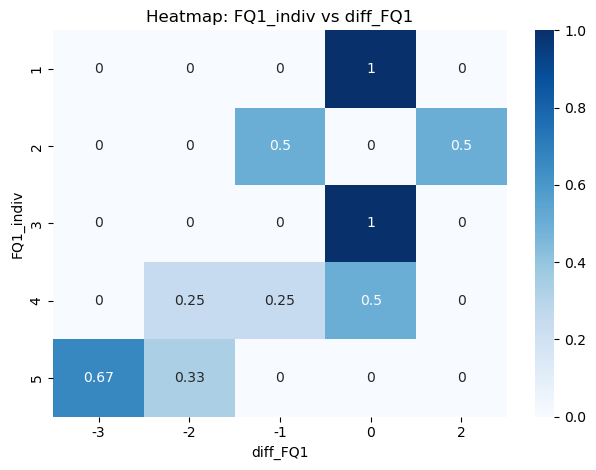

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

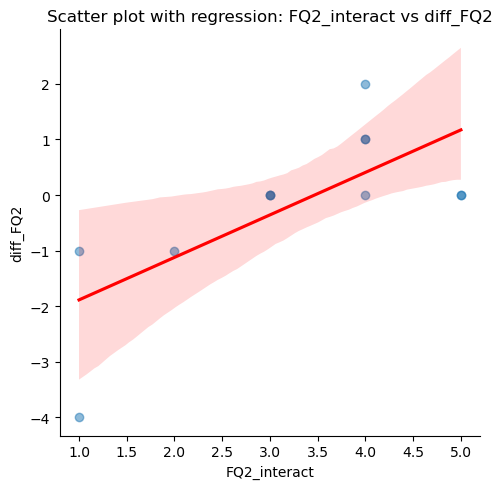

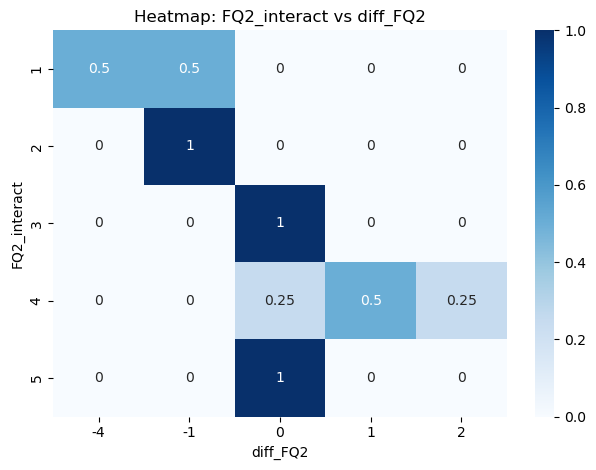

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

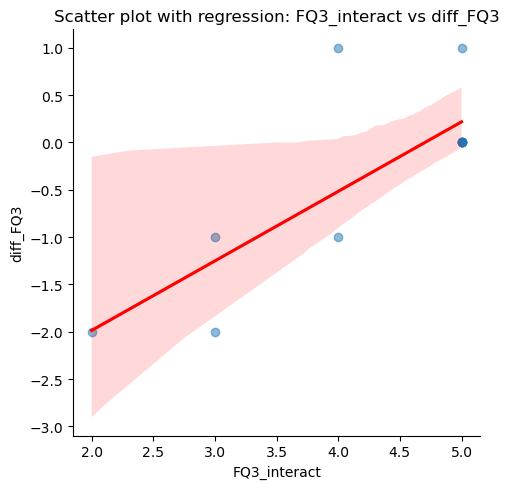

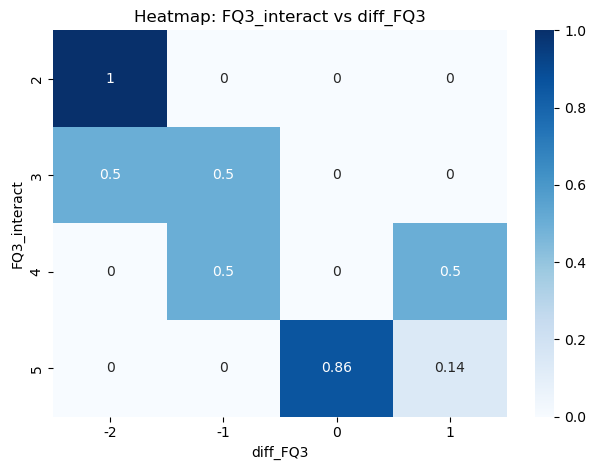

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


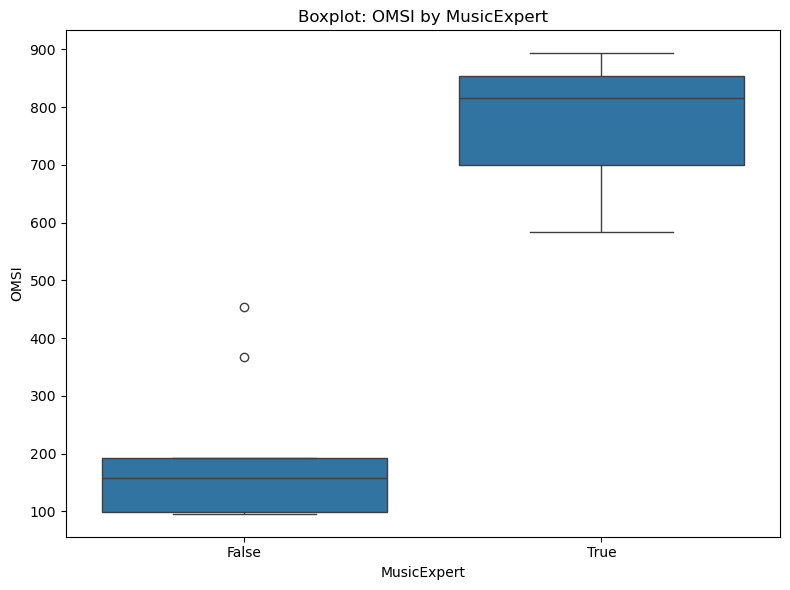

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


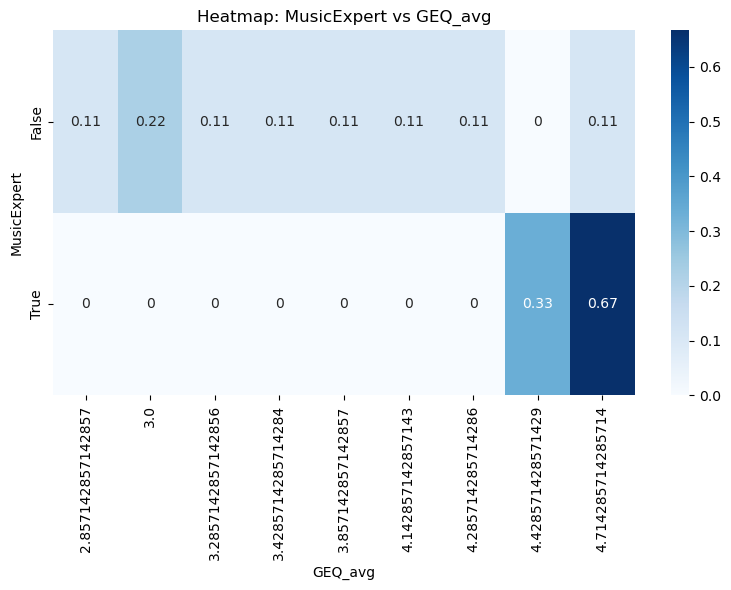

Showing mosaic plot as well...


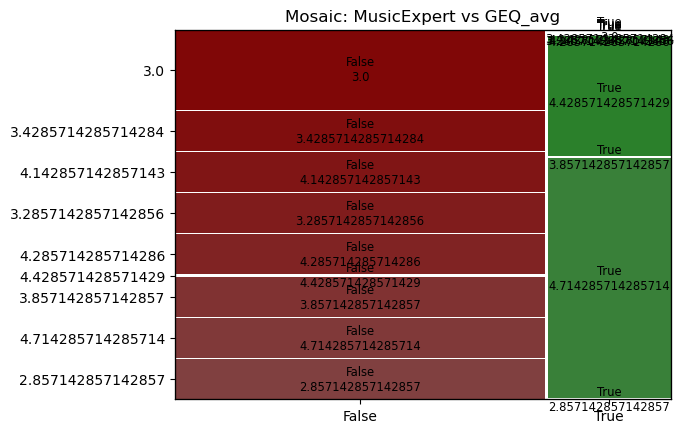

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


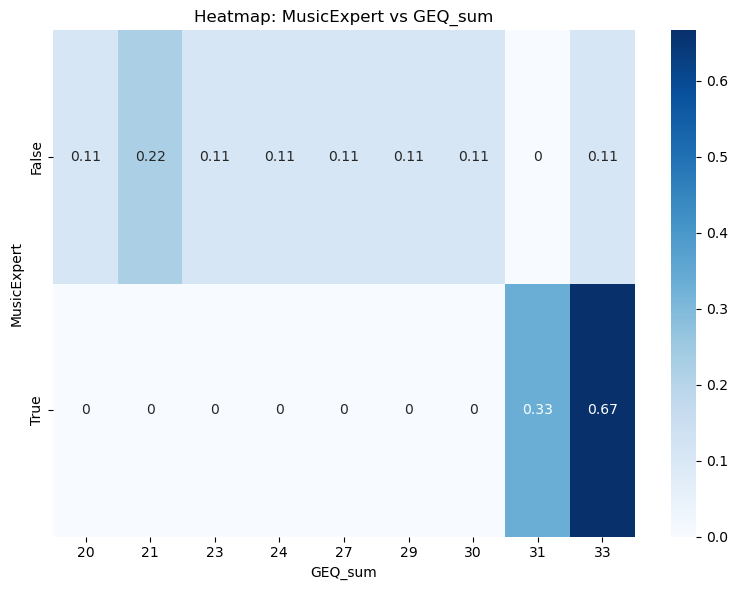

Showing mosaic plot as well...


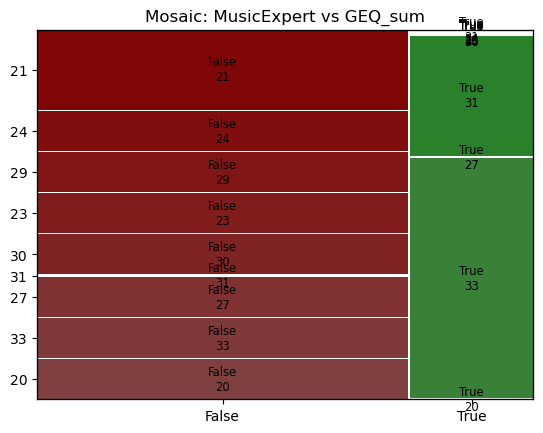

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


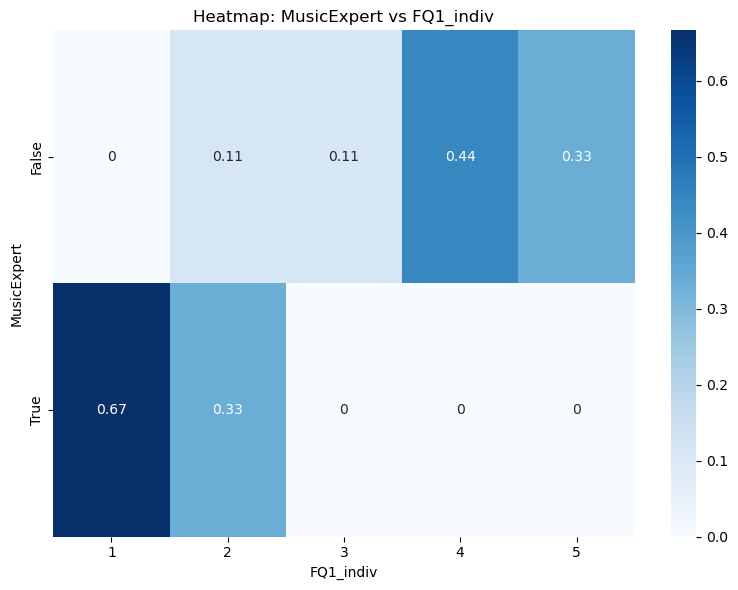

Showing mosaic plot as well...


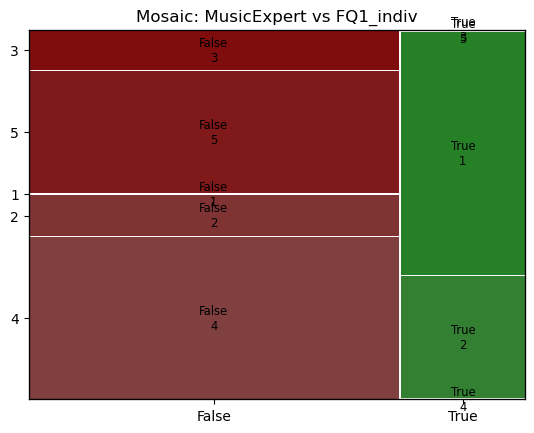

/tmp/ipykernel_14691/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


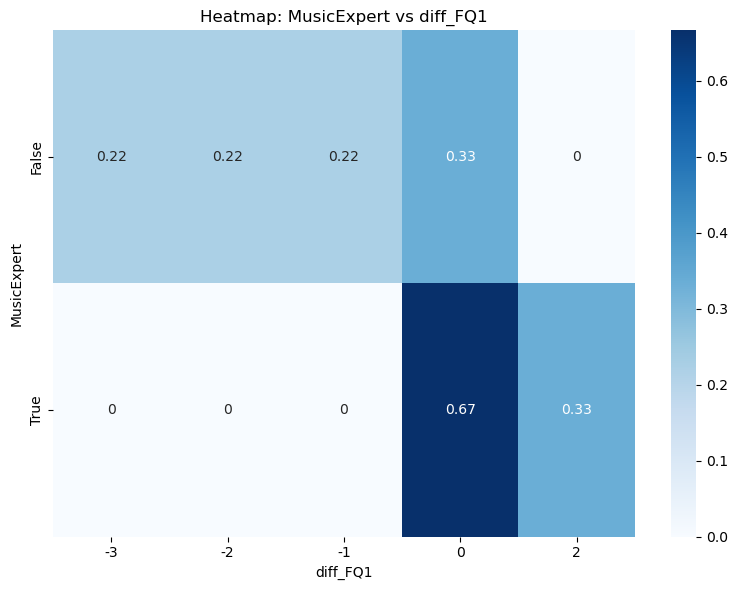

Showing mosaic plot as well...


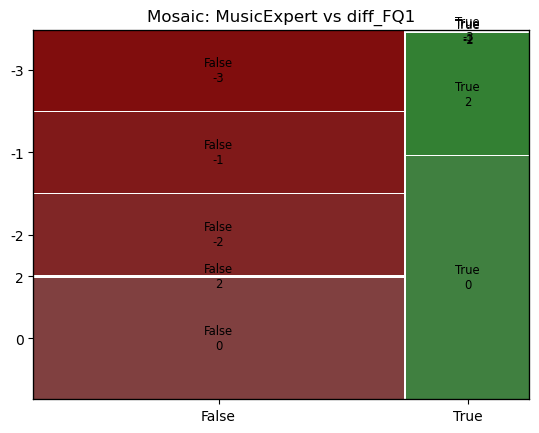

In [10]:
significant = results_df[results_df['p-value'] < 0.05]
print(significant[['var1', 'var2', 'type', 'p-value']])
for (idx, row) in significant.iterrows():
    auto_plot_relationship(df, row.var1, row.var2)

In [ ]:
auto_plot_relationship(df, 'gender', 'score')         # cat vs cont
auto_plot_relationship(df, 'age', 'score')            # cont vs cont
auto_plot_relationship(df, 'gender', 'preferred_color')  # cat vs cat


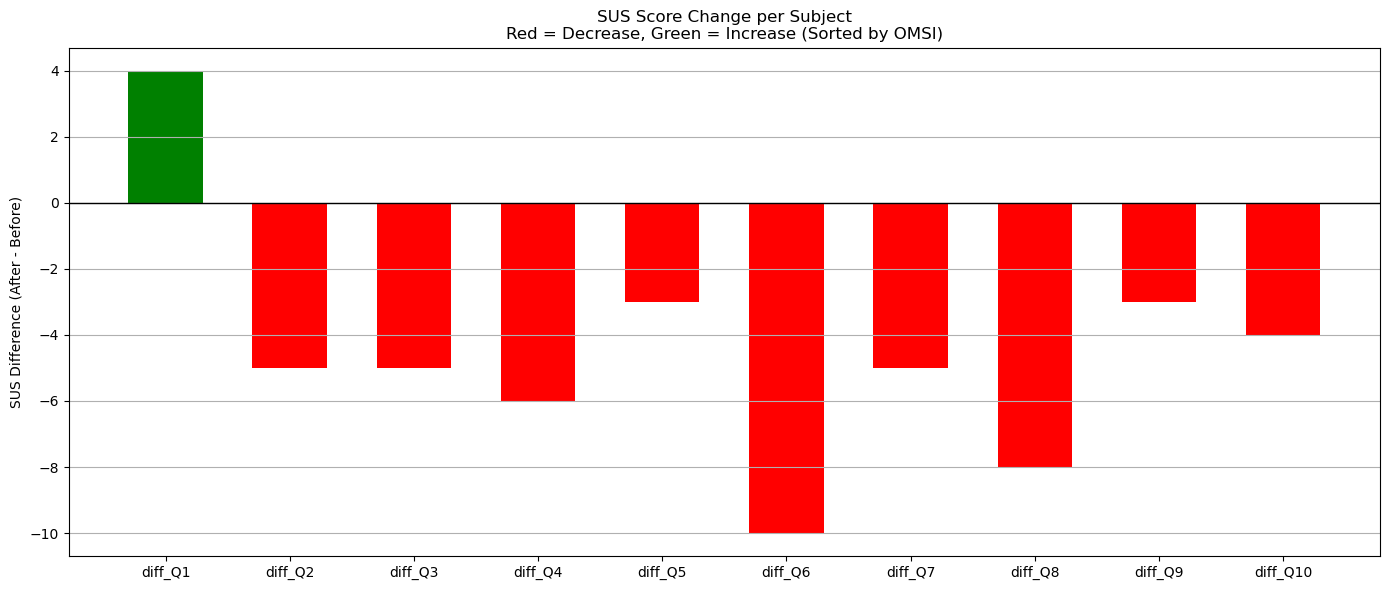

In [100]:
difference = SUS_omsi[['diff_Q1', 'diff_Q2', 'diff_Q3', 'diff_Q4', 'diff_Q5', 'diff_Q6', 'diff_Q7', 'diff_Q8', 'diff_Q9', 'diff_Q10']].sum()
##SUS_omsi[['diff_Q1', 'diff_Q2', 'diff_Q3', 'diff_Q4', 'diff_Q5', 'diff_Q6', 'diff_Q7', 'diff_Q8', 'diff_Q9', 'diff_Q10']].mean()

# 4. Define colors: green if SUS_diff >= 0, else red
colors = ['green' if diff >= 0 else 'red' for diff in difference]

# 5. Plot
plt.figure(figsize=(14, 6))
plt.bar(
    difference.keys(),
    difference.values,
    color=colors,
    width=0.6
)


# 7. Add labels and grid
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("SUS Difference (After - Before)")
plt.title("SUS Score Change per Subject\nRed = Decrease, Green = Increase (Sorted by OMSI)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [129]:
SUS_omsi_overview = SUS_omsi[['Subject Id', 'Group Id', 'MusicExpert', 'OMSI', 'SUS_interact', 'SUS_indiv']].copy()
SUS_omsi_overview['SUS_diff'] = SUS_omsi['SUS_interact'] - SUS_omsi['SUS_indiv']
SUS_learning = SUS_omsi_overview.merge(data_afterquestionnaire[['Subject Id','GQ1','GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7', 'FQ1', 'FQ2', 'FQ3']], on='Subject Id')
SUS_learning['target'] = SUS_learning['SUS_diff'] > 0


In [130]:
SUS_learning

,Subject Id,Group Id,MusicExpert,OMSI,SUS_interact,SUS_indiv,SUS_diff,GQ1,GQ2,GQ3,GQ4,GQ5,GQ6,GQ7,FQ1,FQ2,FQ3,target
0,2,1,True,893,62.5,85.0,-22.5,1,1,1,1,5,3,5,4,4,5,False
1,3,1,False,171,65.0,77.5,-12.5,1,2,1,4,5,3,3,4,3,5,False
2,4,2,True,816,92.5,90.0,2.5,1,2,1,1,5,3,4,1,3,5,True
3,5,2,False,132,77.5,92.5,-15.0,1,2,1,1,5,4,5,2,4,5,False
4,6,2,False,192,80.0,90.0,-10.0,1,5,1,1,5,4,5,3,5,5,False
5,9,3,False,96,97.5,80.0,17.5,5,5,1,1,5,1,5,1,5,5,True
6,8,3,False,99,65.0,100.0,-35.0,3,3,1,1,5,3,5,2,1,5,False
7,7,3,False,454,65.0,80.0,-15.0,1,4,1,3,4,3,2,2,1,3,False
8,10,4,False,99,55.0,37.5,17.5,3,4,1,2,4,1,2,3,4,4,True
9,12,4,False,367,32.5,40.0,-7.5,2,4,2,5,3,4,3,3,2,3,False


In [120]:
a = SUS_learning.groupby('target')
[group['FQ1'].values for name, group in SUS_learning.groupby('target')]


[array([4, 4, 2, 3, 2, 2, 3, 1]), array([1, 1, 3])]

In [128]:

import pandas as pd
from scipy.stats import f_oneway

# Separate the scores by group
grouped_scores = [group['FQ1'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ1")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Separate the scores by group
grouped_scores = [group['FQ2'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ2")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


# Separate the scores by group
grouped_scores = [group['FQ3'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ3")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")




FQ1
F-statistic: 1.7107
P-value: 0.2233
FQ2
F-statistic: 1.0909
P-value: 0.3235
FQ3
F-statistic: 0.4992
P-value: 0.4977


In [131]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA


# Run MANOVA
maov = MANOVA.from_formula('GQ1 + GQ2 + GQ3 + GQ4 + GQ5 + GQ6 + GQ7 ~ target', data=SUS_learning)
print(maov.mv_test())


                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0039 7.0000 3.0000 109.7055 0.0013
         Pillai's trace   0.9961 7.0000 3.0000 109.7055 0.0013
 Hotelling-Lawley trace 255.9796 7.0000 3.0000 109.7055 0.0013
    Roy's greatest root 255.9796 7.0000 3.0000 109.7055 0.0013
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
            target         Value  Num DF Den DF F Value Pr > F
--------------------------------------------------------------
             Wilks' lambda 0.2246 7.0000 3.0000  1.4793 0.4063
            Pillai's trace 0.7754 7.0000 3.0000  1.4793 0.4063
    Hotelli

In [146]:
from scipy.stats import pearsonr

r, p = pearsonr(SUS_learning['target'], SUS_learning['GQ6'])
print(f"Correlation: {r:.2f}, P-value: {p:.4f}")


Correlation: -0.78, P-value: 0.0045


In [1]:
SUS_learning['target']

NameError: name 'SUS_learning' is not defined

In [ ]:

# Melt dataframe to long format
df_long_SUS = SUS_omsi.melt(id_vars=['Subject Id'], value_vars=['SUS_interact', 'SUS_indiv'],value_name='SUS')

df_long_SUS = df_long_SUS.merge(SUS_omsi_overview[['Subject Id', 'MusicExpert', 'OMSI', 'SUS_diff']], on = 'Subject Id')



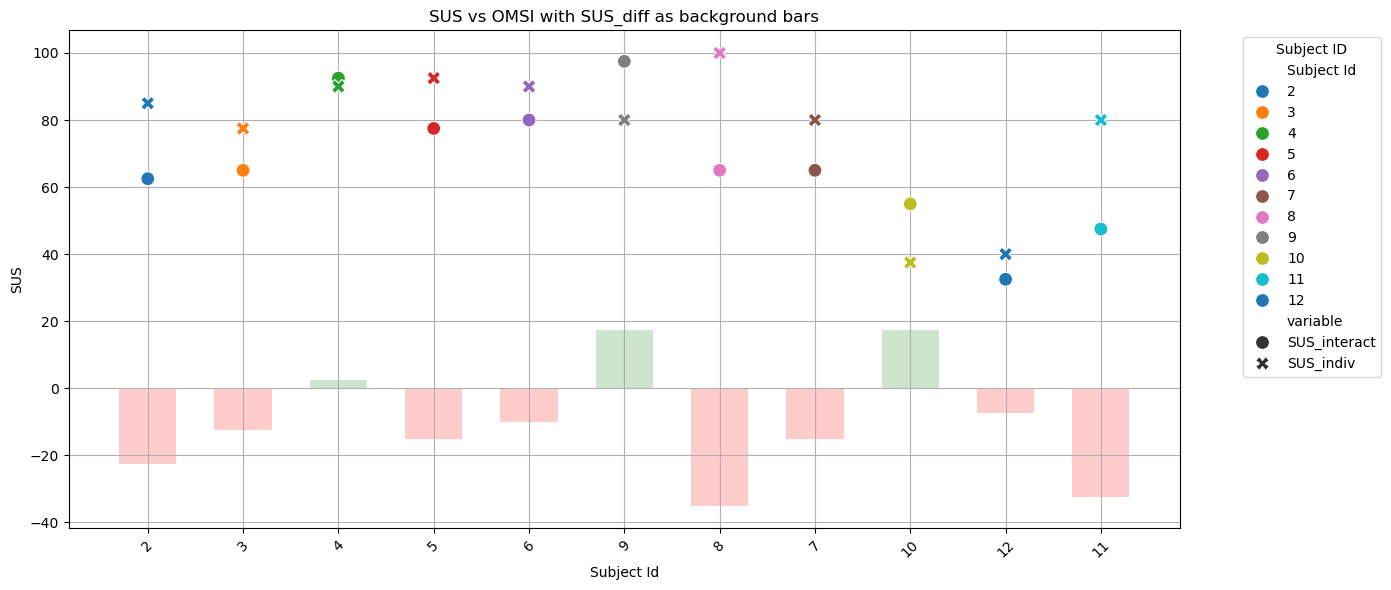

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_long_SUS has columns: 'Subject Id', 'OMSI', 'SUS', 'variable', 'SUS_diff'
# Create an ID-to-position mapping for consistent bar placement
subject_order = df_long_SUS['Subject Id'].unique()
subject_to_x = {subj: i for i, subj in enumerate(subject_order)}

# Add x position column
df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)

# Compute SUS_diff per participant
# If it's already computed in 'SUS_diff', skip this step
# df_diff = df_long_SUS.groupby('Subject Id')['SUS'].diff().dropna()

# Get one row per subject for the bars
df_bars = df_long_SUS.drop_duplicates('Subject Id')

# Plot
plt.figure(figsize=(12, 6))

# 1. Background bars (SUS_diff)
colors = df_bars['SUS_diff'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(
    df_bars['x_pos'], 
    df_bars['SUS_diff'], 
    color=colors, 
    alpha=0.2, 
    width=0.6, 
    zorder=0
)

# 2. Scatterplot on top
sns.scatterplot(
    data=df_long_SUS,
    x='x_pos',
    y='SUS',
    hue='Subject Id',
    style='variable',
    palette='tab10',
    s=100,
    zorder=2,
    #legend = False
)

# Axis labels and ticks
plt.xticks(list(subject_to_x.values()), list(subject_to_x.keys()), rotation=45)
plt.xlabel("Subject Id")
plt.ylabel("SUS")
plt.title("SUS vs OMSI with SUS_diff as background bars")
plt.grid(True, zorder=1)
plt.tight_layout()

# Fix legend
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


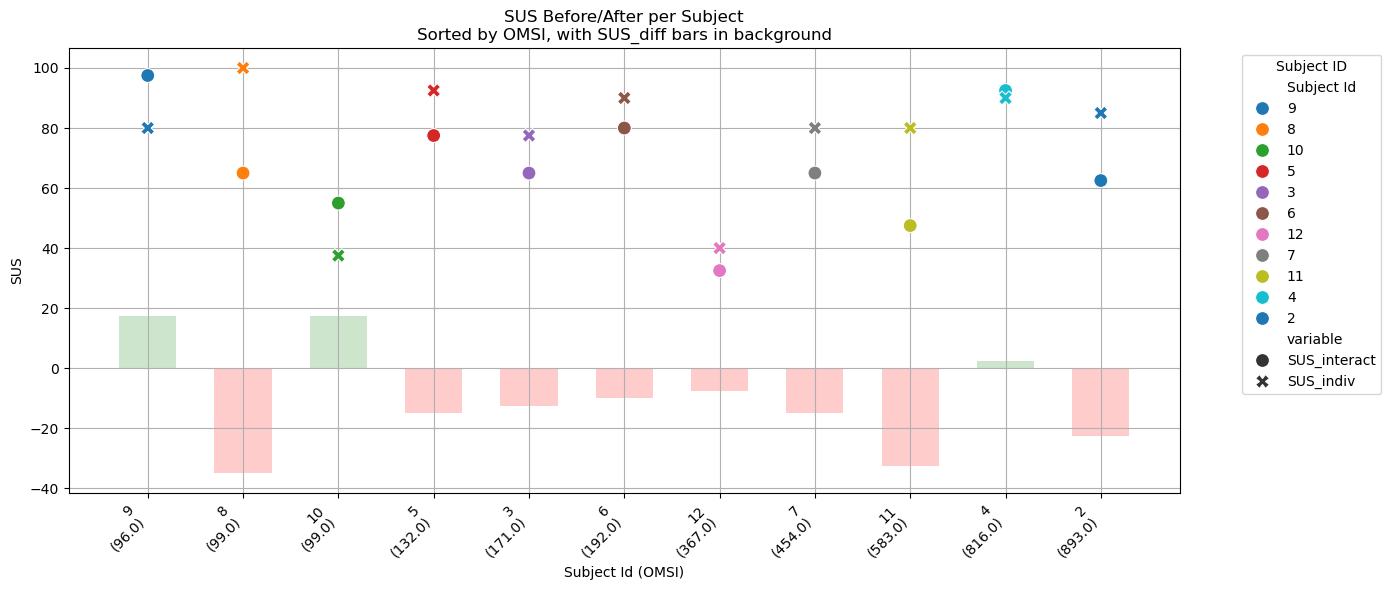

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Get one row per subject for SUS_diff and OMSI
df_bars = df_long_SUS.drop_duplicates('Subject Id').copy()

# 2. Sort subjects by OMSI score
df_bars = df_bars.sort_values('OMSI')
subject_order = df_bars['Subject Id'].tolist()

# Apply ordering to df_long_SUS
df_long_SUS['Subject Id'] = pd.Categorical(df_long_SUS['Subject Id'], categories=subject_order, ordered=True)

# 3. Get x positions for each subject
x_positions = np.arange(len(subject_order))

# 4. Map each subject to x position
subject_to_x = dict(zip(subject_order, x_positions))
df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)
df_bars['x_pos'] = df_bars['Subject Id'].map(subject_to_x)

# 5. Plot
plt.figure(figsize=(14, 6))

# Background bars based on SUS_diff
colors = df_bars['SUS_diff'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(
    df_bars['x_pos'], 
    df_bars['SUS_diff'], 
    color=colors, 
    alpha=0.2, 
    width=0.6, 
    zorder=0
)

# Scatterplot
sns.scatterplot(
    data=df_long_SUS,
    x='x_pos',
    y='SUS',
    hue='Subject Id',
    style='variable',
    palette='tab10',
    s=100,
    zorder=2,
    #legend=False  # optional, since IDs are now on the x-axis
)

# Custom x-axis labels: Subject Id + OMSI below
xtick_labels = [f"{sid}\n({omsi:.1f})" for sid, omsi in zip(df_bars['Subject Id'], df_bars['OMSI'])]
plt.xticks(ticks=x_positions, labels=xtick_labels, rotation=45, ha='right')

plt.xlabel("Subject Id (OMSI)")
plt.ylabel("SUS")
plt.title("SUS Before/After per Subject\nSorted by OMSI, with SUS_diff bars in background")
plt.grid(True, zorder=1)
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
# Set heatmap with discrete levels from 1 to 5
sns.heatmap(
    data_groupenvironment,
    annot=True,
    cmap="YlGnBu",
    cbar=True,
    vmin=1,
    vmax=5,
    linewidths=0.5,
    linecolor='white',
    square=True
)

# Set colorbar ticks to only show integers 1–5
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([1, 2, 3, 4, 5])
colorbar.set_ticklabels([1, 2, 3, 4, 5])

plt.yticks(ticks=np.arange(len(data_groupenvironment)) + 0.5,
           labels=np.arange(1, len(data_groupenvironment) + 1),
           rotation=0)

# Label formatting
plt.title("Group Retrieval Something")
plt.ylabel("ID", rotation=0)

# Show the plot

plt.show()



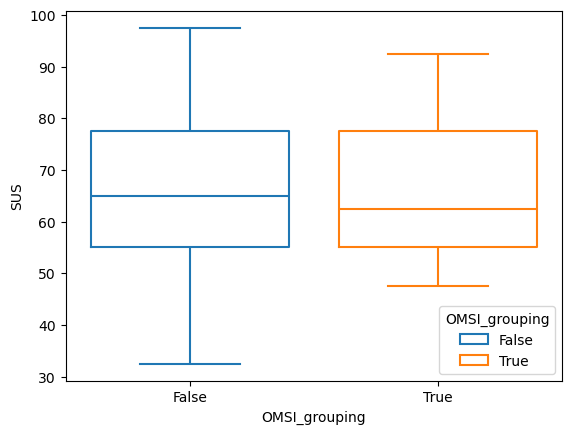

In [11]:
SUS_omsi['OMSI_grouping'] = SUS_omsi['OMSI']>=500
ax = sns.boxplot(x="OMSI_grouping", y="SUS", hue="OMSI_grouping", data=SUS_omsi, fill=False)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

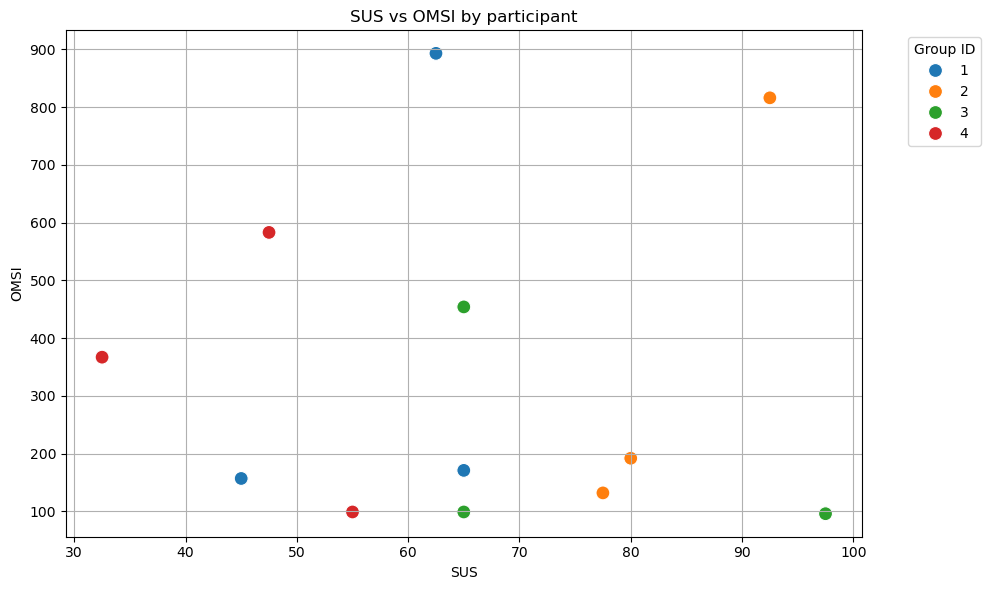

In [ ]:

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=SUS_omsi, x='SUS', y='OMSI', hue='Group Id', palette='tab10', s=100)
plt.title("SUS vs OMSI by participant")
plt.ylabel("OMSI")
plt.xlabel("SUS")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


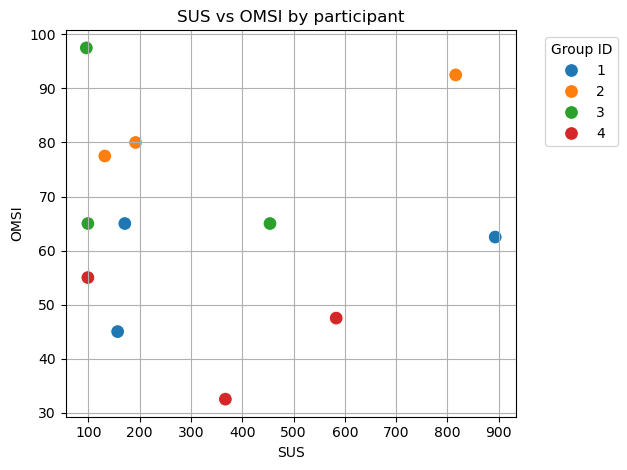

In [ ]:
# Points on top
sns.scatterplot(data=SUS_omsi, x='OMSI', y='SUS', hue='Group Id', palette='tab10', s=100)
plt.title("SUS vs OMSI by participant")
plt.ylabel("SUS")
plt.xlabel("OMSI")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

**5 Point Likert Scale - Post Questionnaire**

/tmp/ipykernel_10052/451278125.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


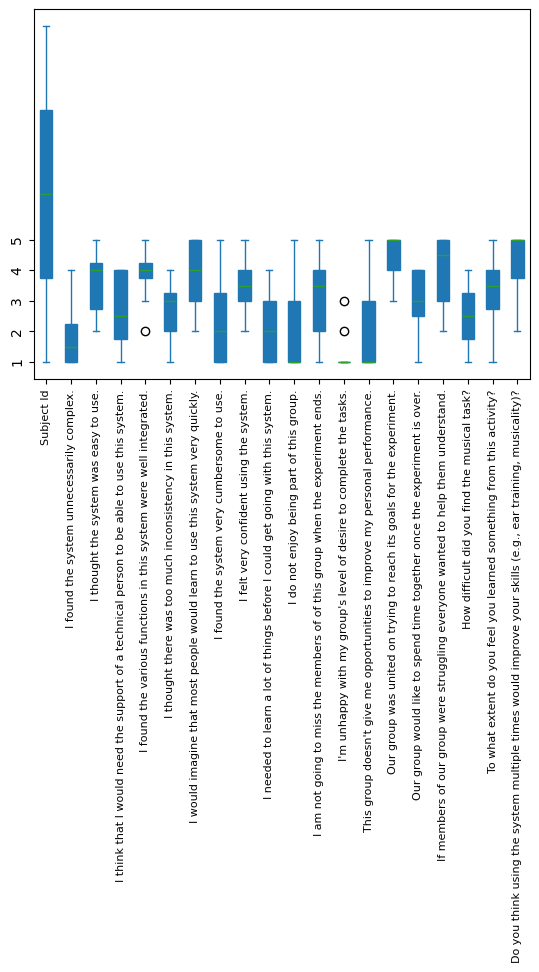

In [77]:
data_likert = data_afterquestionnaire.replace({"Strongly Disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly Agree": 5})

# drops collums that are not needed

data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[20]])


# plotting options
ax = data_likert.plot.box(patch_artist=True) 

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(data_likert.columns))]

# Assign colors to each box
for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)
ax.set_yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

### Task completement

/tmp/ipykernel_10052/2504210182.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')


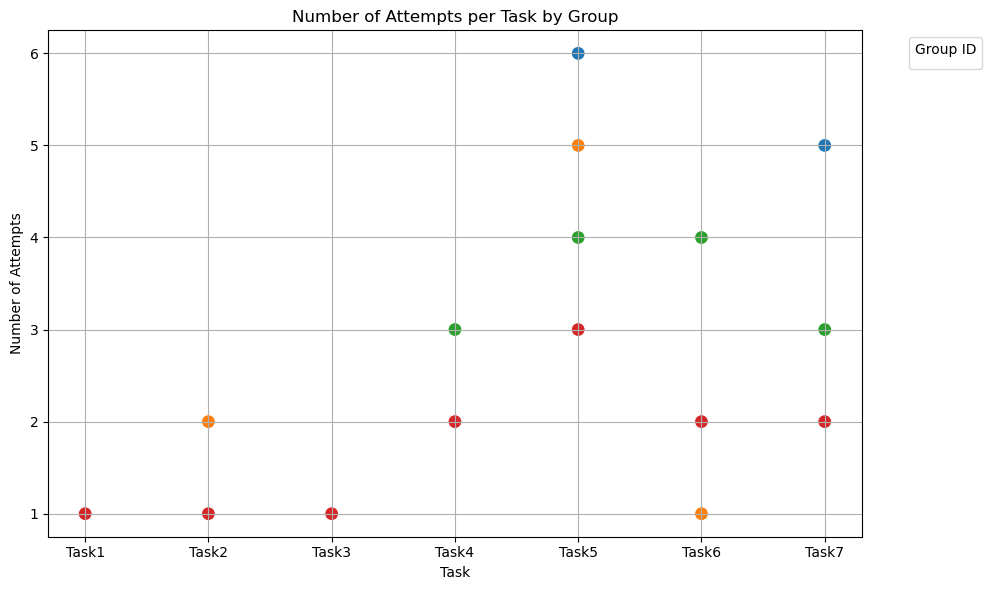

In [81]:
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', s=100, legend=False)
plt.title("Number of Attempts per Task by Group")
plt.ylabel("Number of Attempts")
plt.xlabel("Task")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


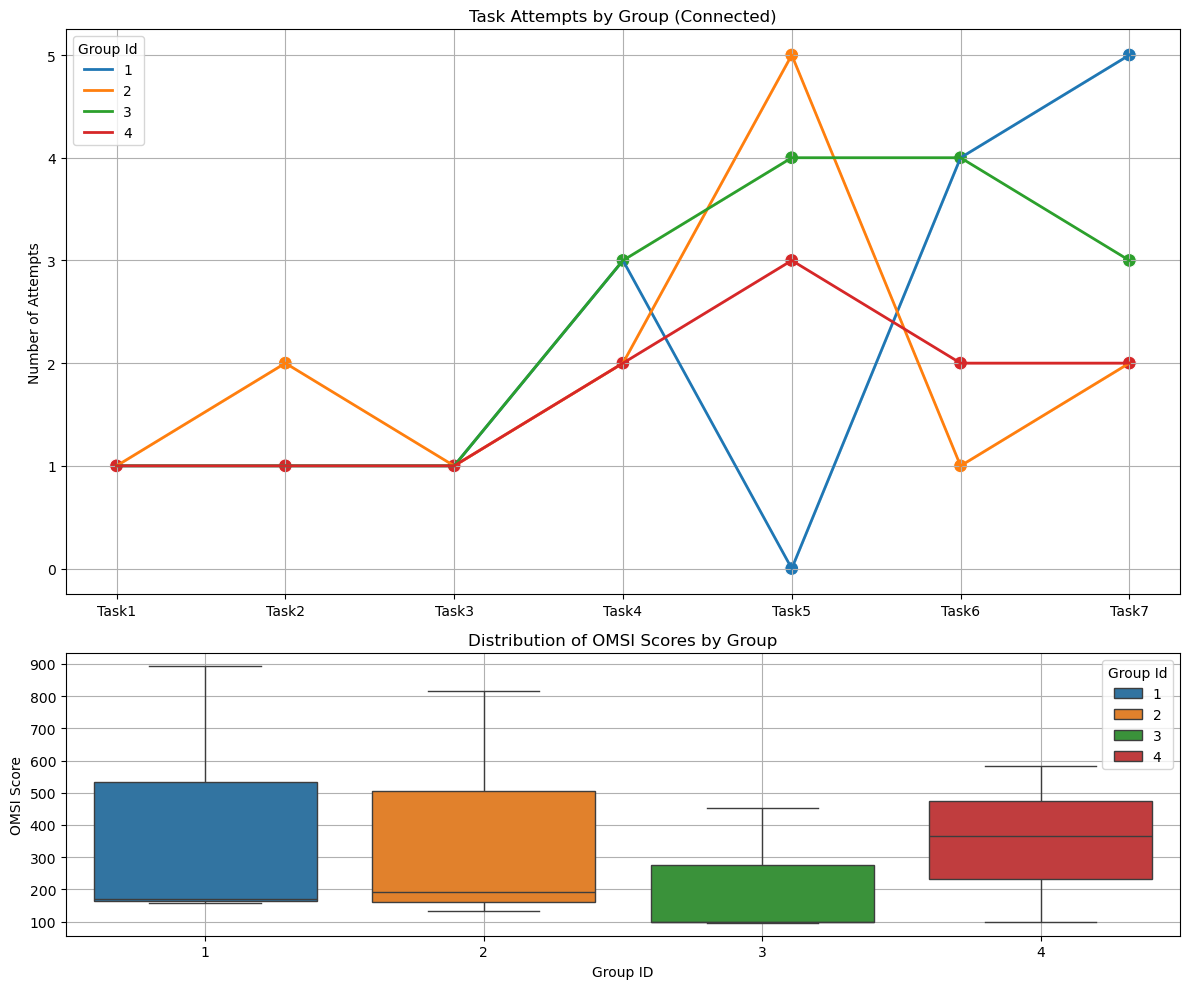

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -- SCATTER + LINE PLOT PART --

# Prepare task columns
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
df_long['Task'] = pd.Categorical(df_long['Task'], categories=task_cols, ordered=True)

# -- PLOT BOTH TOGETHER --
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# Top: Scatter + Line plot
sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
             palette='tab10', linewidth=2, ax=ax1)
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
                palette='tab10', s=100, ax=ax1, legend=False)

ax1.set_title("Task Attempts by Group (Connected)")
ax1.set_ylabel("Number of Attempts")
ax1.set_xlabel("")
ax1.grid(True)

# Bottom: Boxplots of OMSI scores
sns.boxplot(data=data_beforequestionnaire, x='Group Id',hue='Group Id', y='OMSI', palette='tab10', ax=ax2)
ax2.set_title("Distribution of OMSI Scores by Group")
ax2.set_xlabel("Group ID")
ax2.set_ylabel("OMSI Score")
ax2.grid(True)

plt.tight_layout()
plt.show()


**Post Questionnaire - OMS Score**

In [56]:
merged

,Subject Id,Group Id,Age,Gender,Nationality,OMSI,Task1,Task2,Task3,Task4,...,I am not going to miss the members of of this group when the experiment ends.,I'm unhappy with my group's level of desire to complete the tasks.,This group doesn't give me opportunities to improve my personal performance.,Our group was united on trying to reach its goals for the experiment.,Our group would like to spend time together once the experiment is over.,If members of our group were struggling everyone wanted to help them understand.,How difficult did you find the musical task?,To what extent do you feel you learned something from this activity?,"Do you think using the system multiple times would improve your skills (e.g., ear training, musicality)?",Any further feedback you'd like to add?
0,1,1,27,Female,China,157,1,1,1,3,...,4,3,3,4,1,4,4,3,4,NaN
1,2,1,33,Male,British,893,1,1,1,3,...,1,1,1,5,3,5,4,4,5,no
2,3,1,25,Female,Polish,171,1,1,1,3,...,2,1,4,5,3,3,4,3,5,NaN
3,4,2,30,Male,Venezuelan,816,1,2,1,2,...,2,1,1,5,3,4,1,3,5,Excellent idea. As a musician it was very intu...
4,5,2,23,Male,Danish,132,1,2,1,2,...,2,1,1,5,4,5,2,4,5,NaN
5,6,2,25,Female,Danish/Egyptian,192,1,2,1,2,...,5,1,1,5,4,5,3,5,5,"I love it!!!!!! Maybe for future, this could t..."
6,9,3,33,Female,Greek,96,1,1,1,3,...,5,1,1,5,1,5,1,5,5,NaN
7,8,3,33,Male,Northern irish,99,1,1,1,3,...,3,1,1,5,3,5,2,1,5,I would like the latency improved and a left h...
8,7,3,34,Male,Danish,454,1,1,1,3,...,4,1,3,4,3,2,2,1,3,NaN
9,10,4,24,Male,Danish,99,1,1,1,2,...,4,1,2,4,1,2,3,4,4,NaN


In [ ]:
sns.barplot(data=merged, x='OMSI', y='EarTrainingConfidence', hue='Time')
plt.title("Confidence in Ear Training: Musicians vs Non-Musicians")
plt.show()
